# Simple GLM Template

## Data Preprocessing

### Importing necessary libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing and viewing the dataseet

In [111]:
# open up dataset using panda and view it 
df = pd.read_csv('out.csv')
df.head()

,furnishingstatus,area,bedrooms,bathrooms,stories,parking,guestroom,basement,hotwaterheating,airconditioning,mainroad,prefarea,price
0,furnished,7420.0,4.0,2.0,3.0,2.0,no,no,no,yes,yes,yes,NaN
1,furnished,NaN,4.0,4.0,4.0,3.0,no,no,no,yes,yes,no,12250000.0
2,semi-furnished,9960.0,3.0,2.0,2.0,2.0,no,yes,no,no,yes,yes,12250000.0
3,furnished,7500.0,4.0,2.0,2.0,3.0,no,NaN,no,yes,yes,yes,12215000.0
4,furnished,7420.0,4.0,1.0,2.0,2.0,yes,yes,no,yes,yes,no,11410000.0


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   furnishingstatus  533 non-null    object 
 1   area              533 non-null    float64
 2   bedrooms          539 non-null    float64
 3   bathrooms         536 non-null    float64
 4   stories           539 non-null    float64
 5   parking           540 non-null    float64
 6   guestroom         540 non-null    object 
 7   basement          536 non-null    object 
 8   hotwaterheating   537 non-null    object 
 9   airconditioning   541 non-null    object 
 10  mainroad          536 non-null    object 
 11  prefarea          534 non-null    object 
 12  price             530 non-null    float64
dtypes: float64(6), object(7)
memory usage: 55.5+ KB


### Cleaning the dataset

#### Handling duplicate values

In [113]:
boolean = False  # Tracks if any duplicates exist across columns
for col in cols:
    is_duplicate = df.duplicated(subset=[col]).any()  # Check for duplicates in the current column
    print(f"{col} : {is_duplicate}")  # Print the result for the current column
    if is_duplicate:
        boolean = True  # Update the boolean if any duplicates are found

if not boolean:  # If boolean is still False, no duplicates were found
    print("There are no duplicate entries in the dataset.")
else:
    print("Duplicates were found in the dataset.")


furnishingstatus : True
area : True
bedrooms : True
bathrooms : True
stories : True
parking : True
guestroom : True
basement : True
hotwaterheating : True
airconditioning : True
mainroad : True
prefarea : True
price : True
Duplicates were found in the dataset.


#### Handling missing data

In [114]:
# df = data.copy()
missing_values = df.isnull().sum()
total_missing_values = df.isnull().sum().sum()
print(f'Missing values per column:\n{missing_values}')
print('Total missing data:', total_missing_values)
missing_val_percent=(total_missing_values/df.shape[0])*100
print(f'total percentage of missing value is {missing_val_percent:.2f}%')

Missing values per column:
furnishingstatus    12
area                12
bedrooms             6
bathrooms            9
stories              6
parking              5
guestroom            5
basement             9
hotwaterheating      8
airconditioning      4
mainroad             9
prefarea            11
price               15
dtype: int64
Total missing data: 111
total percentage of missing value is 20.37%


#### missing_val_percent < 5% ? dropna() : Impute (depends on size of dataset)

##### Option-1: Remove all missing data columns

In [115]:
if not missing_val_percent < 5:
    df = df.dropna().reset_index(drop=True)

##### Option-2: Use SkLearn Library

In [116]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']

print('Categorical columns :',cat_col)
print('Numerical columns :',num_col)

Categorical columns : ['furnishingstatus', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'mainroad', 'prefarea']
Numerical columns : ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']


In [117]:
yes_no_cols = [col for col in cat_col if df[col].nunique() == 2]

for col in yes_no_cols:
    if col in df.columns:
        df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# OneHotEncode multi-category columns without changing column names
multi_cat_cols = [col for col in cat_col if df[col].nunique() > 2]
if multi_cat_cols:
    onehot = OneHotEncoder(sparse_output=False)
    onehot_encoded = onehot.fit_transform(df[multi_cat_cols])
    
    # Retrieve new column names for encoded categories
    onehot_columns = onehot.get_feature_names_out(multi_cat_cols)
    # Combine the rest of the data with encoded categories
    df = pd.concat(
        [pd.DataFrame(onehot_encoded, columns=onehot_columns, index=df.index), 
         df.drop(columns=multi_cat_cols)], axis=1
    )

In [124]:
df.head()

,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,area,bedrooms,bathrooms,stories,parking,guestroom,basement,hotwaterheating,airconditioning,mainroad,prefarea,price
0,0.0,1.0,0.0,9960.0,3.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,12250000.0
1,1.0,0.0,0.0,7420.0,4.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,11410000.0
2,0.0,1.0,0.0,7500.0,3.0,3.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,10850000.0
3,0.0,1.0,0.0,8580.0,4.0,3.0,4.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,10150000.0
4,1.0,0.0,0.0,8100.0,4.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,9870000.0


##### Split data into features X and target y

In [119]:
X= df.iloc[:, :-1].values #dependent variables
y= df.iloc[:, -1].values  #independent variable

##### Spliting into training and test data

In [120]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
print(X_train)

[[0. 0. 1. ... 1. 1. 0.]
 [0. 0. 1. ... 1. 1. 1.]
 [0. 1. 0. ... 1. 1. 0.]
 ...
 [0. 0. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 1. 0. ... 1. 1. 0.]]


In [122]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']

print('Categorical columns :',cat_col)
print('Numerical columns :',num_col)

Categorical columns : []
Numerical columns : ['furnishingstatus_furnished', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'mainroad', 'prefarea', 'price']


In [123]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # For numerical columns
df[num_col] = imputer.fit_transform(df[num_col])

#### Feature Scaling

In [125]:
df.tail()

,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,area,bedrooms,bathrooms,stories,parking,guestroom,basement,hotwaterheating,airconditioning,mainroad,prefarea,price
442,0.0,0.0,1.0,3649.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1890000.0
443,0.0,0.0,1.0,2990.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1855000.0
444,0.0,1.0,0.0,2400.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1767150.0
445,1.0,0.0,0.0,2910.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1750000.0
446,0.0,0.0,1.0,3850.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1750000.0


In [96]:
print(X_train)

[[0. 0. 1. ... 1. 1. 0.]
 [0. 0. 1. ... 1. 1. 1.]
 [0. 1. 0. ... 1. 1. 0.]
 ...
 [0. 0. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 1. 0. ... 1. 1. 0.]]


In [126]:
print(y_train)

[ 8400000.  6475000.  4690000.  4165000.  7490000.  6090000.  3633000.
  3290000.  4690000.  3815000.  5880000.  4200000.  4410000.  2940000.
  3500000.  4753000.  5740000.  1767150.  9800000.  7070000.  4900000.
  2835000.  3010000.  3836000.  8400000.  2450000.  5460000.  3500000.
 10150000.  8400000.  4165000.  6629000.  4270000.  5229000.  6580000.
  5600000.  3570000.  4305000.  7560000.  4900000.  5250000.  7840000.
  9681000.  2695000.  5600000.  4235000.  2520000.  5530000.  5600000.
  4830000.  2450000.  1750000.  3360000.  4900000.  3703000.  2852500.
  5215000.  2450000.  2870000.  2870000.  4550000.  5600000.  4270000.
  5110000.  3220000.  4935000.  4767000.  3990000.  6090000.  3010000.
  4690000.  6265000.  4193000.  3150000.  4515000.  5530000.  4130000.
  3990000.  4480000.  2940000.  3115000.  4473000.  4403000.  3360000.
  4200000.  7350000.  5243000.  3500000.  4550000.  3290000.  2520000.
  6650000.  5600000.  2275000.  4130000.  9800000.  3500000.  3605000.
  4900

### Modelling

#### Training Simple Regression model

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [128]:
print(regressor.get_params)
print(regressor.score)

<bound method BaseEstimator.get_params of LinearRegression()>
<bound method RegressorMixin.score of LinearRegression()>


In [129]:
from sklearn.model_selection import cross_val_score
mse=cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error',cv=10)
mean_mse=np.mean(mse)
print(mean_mse) #this val should be inclined to 0 

-976872781129.3926


#### Ridge Regression

In [130]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()

params = {'alpha':[1e-15,1e-10,1e-8,1e-2,1e-3,1,5,10,20,0.1]}
ridge_regressor = GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=10,error_score='raise')
ridge_regressor.fit(X_train,y_train)

C:\Users\Krrish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.05994e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Krrish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.08236e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Krrish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.87733e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Krrish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.09831e-23): result may not be accurate.
  return linalg.s

GridSearchCV(cv=10, error_score='raise', estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 0.001, 1, 5, 10,
                                   20, 0.1]},
             scoring='neg_mean_squared_error')

In [131]:
print(ridge_regressor.best_estimator_)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

Ridge(alpha=5)
{'alpha': 5}
-974643237297.2844


In [132]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()

params = {'alpha':[1e-15,1e-10,1e-8,1e-2,1e-3,1,5,10,20,0.1]}
lasso_regressor = GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=10)
lasso_regressor.fit(X_train,y_train)

C:\Users\Krrish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.432e+14, tolerance: 8.333e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\Krrish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.463e+14, tolerance: 8.966e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\Krrish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the 

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 0.001, 1, 5, 10,
                                   20, 0.1]},
             scoring='neg_mean_squared_error')

In [133]:
print(lasso_regressor.best_estimator_)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

Lasso(alpha=20)
{'alpha': 20}
-976872043491.7949


In [134]:
# Predictions
y_pred = regressor.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 1420924886086.5803
R² Score: 0.6495833965840456


### Visualizing

(357, 14) (357,)
(90, 14) (90,)
[np.float64(1890000.0), np.float64(12250000.0)] [np.float64(1890000.0), np.float64(12250000.0)]


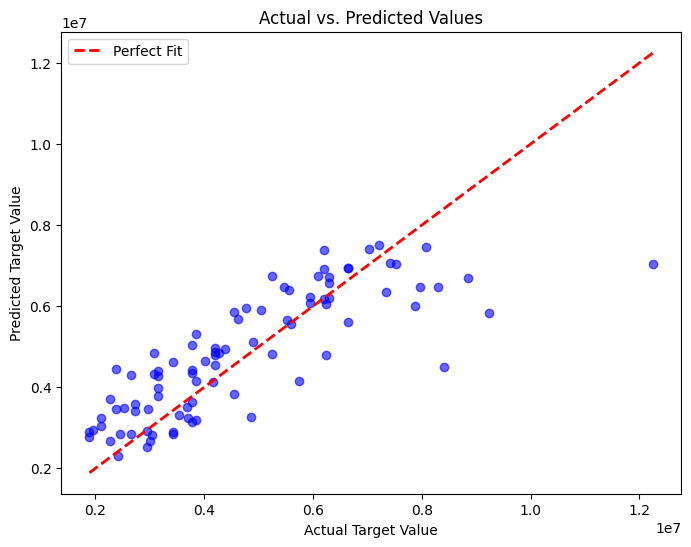

In [136]:
# Visualization of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
    color='red', linestyle='--', linewidth=2, label='Perfect Fit'
)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Target Value')
plt.ylabel('Predicted Target Value')
plt.legend()
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])

In [137]:
df.head(100)

,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,area,bedrooms,bathrooms,stories,parking,guestroom,basement,hotwaterheating,airconditioning,mainroad,prefarea,price
0,0.0,1.0,0.0,9960.0,3.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,12250000.0
1,1.0,0.0,0.0,7420.0,4.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,11410000.0
2,0.0,1.0,0.0,7500.0,3.0,3.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,10850000.0
3,0.0,1.0,0.0,8580.0,4.0,3.0,4.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,10150000.0
4,1.0,0.0,0.0,8100.0,4.0,1.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,9870000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,1.0,6500.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5880000.0
96,1.0,0.0,0.0,5500.0,3.0,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,5873000.0
97,0.0,0.0,1.0,4800.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,5866000.0
98,0.0,0.0,1.0,4800.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5810000.0
